In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
amaz = pd.read_csv('amazon_cells_labelled.txt', delimiter="\t", header = None)
amaz.columns = ['message','positive']

print(amaz)

                                               message  positive
0    So there is no way for me to plug it in here i...         0
1                          Good case, Excellent value.         1
2                               Great for the jawbone.         1
3    Tied to charger for conversations lasting more...         0
4                                    The mic is great.         1
5    I have to jiggle the plug to get it to line up...         0
6    If you have several dozen or several hundred c...         0
7          If you are Razr owner...you must have this!         1
8                  Needless to say, I wasted my money.         0
9                     What a waste of money and time!.         0
10                     And the sound quality is great.         1
11   He was very impressed when going from the orig...         1
12   If the two were seperated by a mere 5+ ft I st...         0
13                            Very good quality though         1
14   The design is very o

In [4]:
keywords = ['great', 'fantastic', 'wonderful', 'good', 'friend', 'love', 'excellent', 'perfect', 'happy', 'fine', 'impressed',
           'recommend']

for key in keywords:
    amaz[str(key)] = amaz.message.str.contains(' '+ str(key) + ' ', case=False)

In [5]:
amaz['positive'] = (amaz['positive'] == 1)
amaz

,message,positive,great,fantastic,wonderful,good,friend,love,excellent,perfect,happy,fine,impressed,recommend
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,True,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",False,False,False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,False,False,False,False,False,False,False,False,False,False,False,False,False


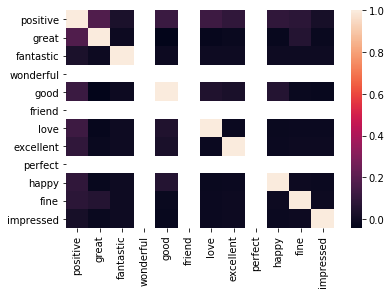

In [37]:
sns.heatmap(amaz.corr())

In [6]:
data = amaz[keywords]
target = amaz['positive']


In [7]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)


In [8]:
print("Number of mislabeled points out of the total {} points: {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of the total 1000 points: 394


In [11]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter="\t", header = None)
imdb.columns = ['message','positive']
imdb

,message,positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [12]:
keywords = ['great', 'fantastic', 'wonderful', 'good', 'friend', 'love', 'excellent', 'perfect', 'happy', 'fine', 'impressed',
           'recommend']

for key in keywords:
    imdb[str(key)] = imdb.message.str.contains(' '+ str(key) + ' ', case=False)

In [13]:
imdb['positive'] = (imdb['positive'] == 1)
imdb

,message,positive,great,fantastic,wonderful,good,friend,love,excellent,perfect,happy,fine,impressed,recommend
0,"A very, very, very slow-moving, aimless movie ...",False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,True,False,False,False,False,False,False,False,False,False,False,False,False
5,"The rest of the movie lacks art, charm, meanin...",False,False,False,False,False,False,False,False,False,False,False,False,False
6,Wasted two hours.,False,False,False,False,False,False,False,False,False,False,False,False,False
7,Saw the movie today and thought it was a good ...,True,False,False,False,True,False,False,False,False,False,False,False,False
8,A bit predictable.,False,False,False,False,False,False,False,False,False,False,False,False,False
9,Loved the casting of Jimmy Buffet as the scien...,True,False,False,False,False,False,False,False,False,False,False,False,False


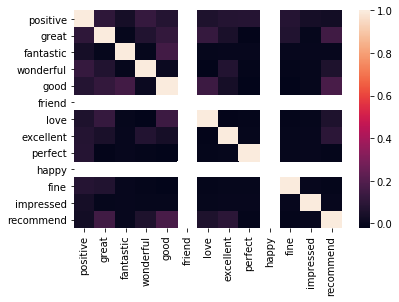

In [14]:
sns.heatmap(imdb.corr())

In [15]:
data_2 = imdb[keywords]
target_2 = imdb['positive']

In [17]:
bnb.fit(data_2, target_2)

y_pred_2 = bnb.predict(data_2)

In [18]:
print("Number of mislabeled points out of the total {} points: {}".format(data_2.shape[0], (target_2 != y_pred_2).sum()))

Number of mislabeled points out of the total 748 points: 318


My model in the first set of data ran and was not very effective. The more words I put into the "keywords" string, the better the performance. I got it below 50% mislabeled and stopped. I looked at a few of the messages to select some of the words that related to a positive message. The model performed about the same on the imdb data.